In [1]:
import numpy as np

In [2]:
import pandas as pd

data = pd.read_csv('data/spam.csv', encoding='latin-1')
y = data.v1
X = data.v2

In [3]:
print(X.head())
print(len(X))
print(y.head())

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object
5572
0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object


In [4]:
# Utilize SVM para predecir Ham vs Spam.
# Use las tecnicas de NLP vistas en la clase y utilice SVM para realizar la estimacion!
# use cross validation y todo lo que ha aprendido en el curso!

# ANTORCHA!
# ejercicio extra: https://www.kaggle.com/c/nlp-getting-started ingrese en la competencia y envie sus resultados!

In [5]:
# Vectorize corpus
from sklearn.feature_extraction.text import CountVectorizer

my_stop_words = frozenset(["this"])

vectorizer = CountVectorizer(stop_words= my_stop_words)
X_vectorized = vectorizer.fit_transform(X)

In [6]:
print('Tokens')
print(vectorizer.get_feature_names()[1000:1050])
print("")
print('Vectorized Corpus')
print(X_vectorized.toarray())

Tokens
['airtel', 'aiya', 'aiyah', 'aiyar', 'aiyo', 'ajith', 'ak', 'aka', 'akon', 'al', 'alaikkum', 'alaipayuthe', 'albi', 'album', 'alcohol', 'aldrine', 'alert', 'alertfrom', 'alerts', 'aletter', 'alex', 'alfie', 'algarve', 'algebra', 'algorithms', 'ali', 'alian', 'alibi', 'alive', 'all', 'allah', 'allalo', 'allday', 'alle', 'allo', 'allow', 'allowed', 'allows', 'almost', 'alone', 'along', 'alot', 'already', 'alright', 'alrite', 'also', 'alter', 'alternative', 'although', 'alto18']

Vectorized Corpus
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
# Y encoded
y = np.array([1 if item == 'spam' else 0 for item in y ])

In [8]:
# Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.20, random_state=42)

In [35]:
# SVM
from sklearn.svm import SVC

svc_model = SVC(kernel='linear')

svc_clf = svc_model.fit(X_train, y_train) # classifier

svm_y_prima = svc_clf.predict(X_test)
svm_y_prima

array([0, 0, 0, ..., 0, 0, 1])

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

accuracy_score(y_test, svm_y_prima)

scores = cross_val_score(svc_clf, X_vectorized, y, cv=10)
print("CV - Exactitud c/u:", scores)
print('CV - Exactitud Promedio %.3f' % scores.mean())

Exactitud c/u: [0.99283154 0.97670251 0.98384201 0.98563734 0.98204668 0.97845601
 0.98563734 0.98384201 0.98563734 0.98743268]
Exactitud Promedio 0.984


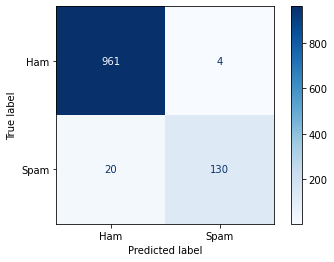

[[961   4]
 [ 20 130]]


In [37]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

class_names = ['Ham','Spam']

disp = plot_confusion_matrix(svc_clf, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=None)

plt.show()
print(disp.confusion_matrix)

In [38]:
print(classification_report(y_test, svm_y_prima, target_names=['one','tow']))

              precision    recall  f1-score   support

         one       0.98      1.00      0.99       965
         tow       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

